# Problema 3

Implementación del algoritmo markov_ising().

In [1]:
#Librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt

Podemos partir definiendo las condiciones de la lattice y utilizando la expresión para vecinos periódicos del Problema 2:

In [2]:
#Parámetros Lattice
L = 6
N = L * L
vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}

#Definimos el numéro de samples
samples = 10**6

Ahora seguimos el pseudo-código de la clase para definir la función markov_ising()

In [3]:
def markov_ising(S, N, E, beta, iter):
  E1, E2 = 0, 0
  M_tot = 0

  for sample in range(samples):
    k = random.randint(0, N-1)
    h = 0
    for j in vecinos[k]:
      h += S[j]

    delta_E = 2*S[k]*h

    gamma = np.exp(-beta*delta_E)

    if random.uniform(0, 1) < gamma:
      S[k] *= -1
      E += delta_E
    M_tot += abs(np.sum(S))
    E1 += E
    E2 += E**2

  M_av = M_tot/(samples*N)

  return E1/samples, E2/samples, M_av

Ahora que hemos definido la función mrakov_ising() con el respectivo criterio de metropolis, podemos hacer la simulación para $T$ en el intervalo deseado y hallar la energía promedio $<E/N>$y el calor específico $c_v$

In [4]:
def simulate_ising(L, N,T, iter):
    beta = 1 / T
    # Inicialización aleatoria de espines
    S = []
    for k in range(N):
      S.append(random.choice([1, -1]))
    # Energía inicial del sistema
    E = 0
    for k in range(N):
        suma_vecinos = 0
        for j in vecinos[k]:
            suma_vecinos += S[j]
        E += S[k] * suma_vecinos
    E *= -0.5


    E_av, E2_av, M_av = markov_ising(S, N, E, beta, iter)

    return E_av, E2_av, M_av

In [ ]:
def calor_especifico(E_av, E2_av, beta, N):
    return beta ** 2 * (E2_av - E_av ** 2) / N #Definición de c_v

T_rango = np.linspace(0.5, 4.0, 8)  # Lista de temperaturas
energias = []
cv_s = []

# Simulación para cada temperatura
for T in T_rango:
    E_av, E2_av, M_av = simulate_ising(L, N, T, iter)
    energias.append(E_av / N)  # Energía promedio por espín
    cv_s.append(calor_especifico(E_av, E2_av, 1.0 / T, N))
    print(f'Temperatura: {T}, Energía promedio: {E_av / N}, Calor específico: {calor_especifico(E_av, E2_av, 1/T, N)}')

Temperatura: 0.5, Energía promedio: -1.8556180000000002, Calor específico: 10.904623794055018
Temperatura: 1.0, Energía promedio: -1.996706, Calor específico: 0.030084050970647997
Temperatura: 1.5, Energía promedio: -1.9522628888888889, Calor específico: 0.19228970390992609
Temperatura: 2.0, Energía promedio: -1.7445, Calor específico: 0.6924450833333348
Temperatura: 2.5, Energía promedio: -1.2777062222222222, Calor específico: 1.0105528593965516
Temperatura: 3.0, Energía promedio: -0.8811792222222222, Calor específico: 0.5515656515669629
Temperatura: 3.5, Energía promedio: -0.6842696666666667, Calor específico: 0.29983832691776874
Temperatura: 4.0, Energía promedio: -0.5671956666666667, Calor específico: 0.18595361480219452


Calculando el error se obtiene que en promedio existe un error en la energía del $0.12 \%$ mientras que para el calor específico $c_v$ se tiene en promedio un error del $0.15 \%$ por lo cual sabemos que el algoritmo funciona de forma eficiente.

Para la grafica se dividirá el intervalo de temperatura en más valores de forma que las curvas sean más suaves.

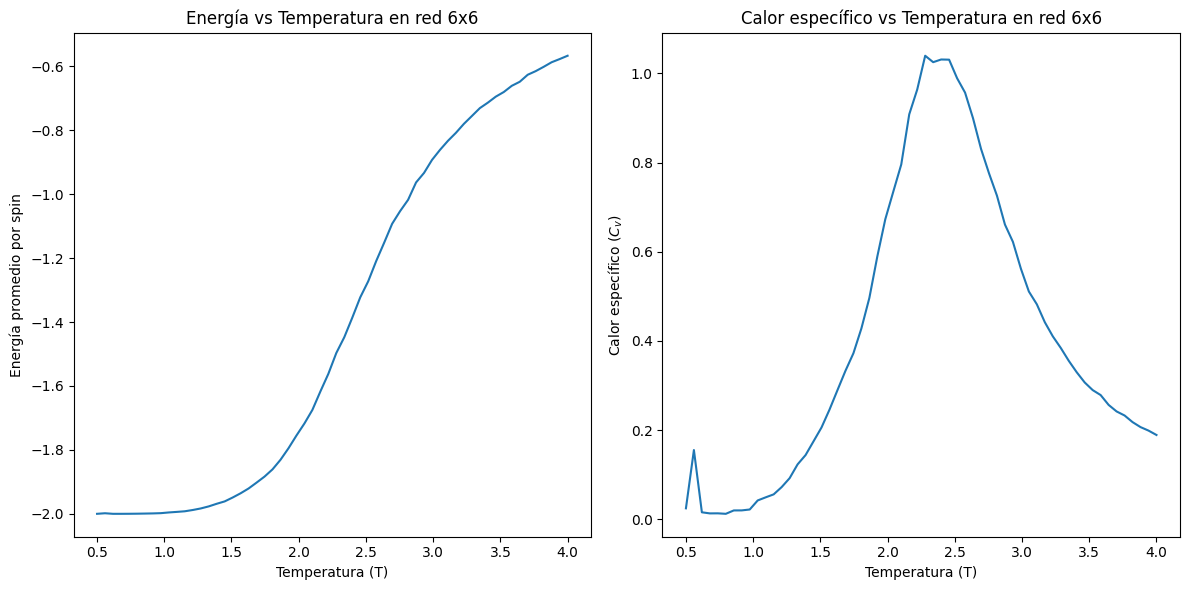

In [ ]:
def calor_especifico(E_av, E2_av, beta, N):
    return beta ** 2 * (E2_av - E_av ** 2) / N #Definición de c_v

T_rango = np.linspace(0.5, 4.0, 60)  # Lista de temperaturas
energias = []
cv_s = []

# Simulación para cada temperatura
for T in T_rango:
    E_av, E2_av, _ = simulate_ising(L, N, T, iter)
    energias.append(E_av / N)  # Energía promedio por espín
    cv_s.append(calor_especifico(E_av, E2_av, 1.0 / T, N))

plt.figure(figsize=(12, 6))

# Energía promedio vs Temperatura
plt.subplot(1, 2, 1)
plt.plot(T_rango, energias)
plt.xlabel('Temperatura (T)')
plt.ylabel('Energía promedio por spin')
plt.title('Energía vs Temperatura en red 6x6')

# Calor específico vs Temperatura
plt.subplot(1, 2, 2)
plt.plot(T_rango, cv_s,marker=".")
plt.grid()
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico ($C_v$)')
plt.title('Calor específico vs Temperatura en red 6x6')

plt.tight_layout()
plt.show()

Ahora calculamos la magnetización

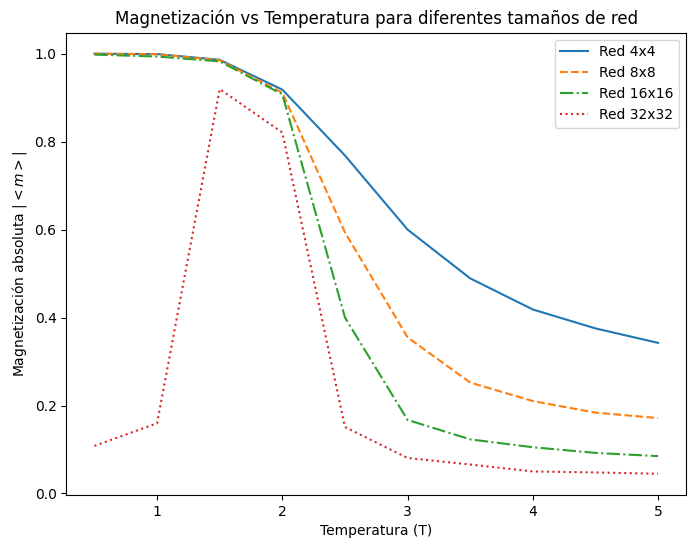

In [7]:
L_list = [4, 8, 16, 32]  #Tenemos diferentes tamaños de red
T_list = np.linspace(0.5, 5.0, 10)

magnetizacion = {L: [] for L in L_list}

# Simulación para cada tamaño de red y temperatura
for L in L_list:
    N = L * L
    vecinos = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,(i // L) * L + (i - 1) % L, (i - L) % N) for i in range(N)}

    for T in T_list:
        E_av, E2_av, M_av = simulate_ising(L, N, T, iter)
        magnetizacion[L].append(M_av)  # Magnetización promedio por espín

plt.figure(figsize=(8, 6))
linestyles = {4: '-', 8: '--', 16: '-.', 32: ':'}
for L in L_list:
    plt.plot(T_list, magnetizacion[L], linestyle=linestyles[L], label=f'Red {L}x{L}')

plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización absoluta $|<m>|$')
plt.title('Magnetización vs Temperatura para diferentes tamaños de red')
plt.legend()
plt.show()
